### Resources:
* [D-separation steps](http://web.mit.edu/jmn/www/6.034/d-separation.pdf)
* [bnlearn datasets](https://www.bnlearn.com/bnrepository/)
* [Daggity paper](https://academic.oup.com/ije/article/45/6/1887/2907796)
* [Milestone](https://gitlab.pnnl.gov/y0-scuc/y0-archive/-/milestones/4)
* [pgmpy](https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb)  -- get_independencies

### TODO:
* Break into module, write proper unit tests
* What about conditional independencies?  Currently only covers independencies.  
   * Can I just enumerate tripples and check 'A,B given=["C"]'?  
   * Would then check combinations-pairs + combinations-givens 
   * Up to how many givens do you check?

In [25]:
from y0.algorithm import falsification
from y0.graph import ADMG
import y0.examples
from y0.dsl import Variable

import networkx as nx
import pandas as pd

import seaborn as sns
from itertools import chain
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


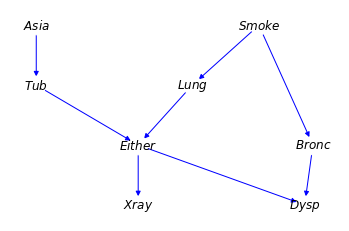

In [12]:
asia_G = y0.examples.asia_example.graph #.to_admg()
asia_df = y0.examples.asia_example.data

asia_G.draw()

In [29]:
asia_df

,Unnamed: 0,Asia,Smoke,Tub,Lung,Bronc,Either,Xray,Dysp
0,1,-1,1,-1,-1,1,-1,-1,1
1,2,-1,1,-1,-1,-1,-1,-1,-1
2,3,-1,-1,1,-1,-1,1,1,1
3,4,-1,-1,-1,-1,1,-1,-1,1
4,5,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...
4995,4996,-1,-1,-1,-1,1,-1,1,1
4996,4997,-1,-1,-1,-1,-1,-1,-1,-1
4997,4998,-1,-1,-1,-1,-1,-1,-1,-1
4998,4999,-1,1,-1,-1,-1,-1,-1,1


In [18]:
issues = falsification.falsifications(asia_G, asia_df, max_given=2, verbose=True)

d-separation check: 28it [00:00, 472.05it/s]
Checking conditionals: 100%|██████████| 17/17 [00:00<00:00, 301.54it/s]


In [19]:
issues.evidence

,left,right,given,chi^2,p,dof,Holm–Bonferroni level,flagged
7,Asia,Xray,"(Either,)",4.268355,0.118342,2,0.004545,False
6,Bronc,Lung,"(Smoke,)",3.477138,0.175772,2,0.004167,False
0,Asia,Dysp,"(Tub,)",1.498154,0.472803,2,0.002778,False
2,Dysp,Xray,"(Either,)",0.656339,0.720241,2,0.003125,False
9,Smoke,Xray,"(Either,)",0.487209,0.783798,2,0.005556,False
12,Bronc,Xray,"(Either,)",0.206653,0.901833,2,0.008333,False
15,Asia,Bronc,(),2.495844,0.114147,1,0.016667,False
13,Bronc,Tub,(),2.364399,0.124132,1,0.010000,False
11,Asia,Smoke,(),1.841060,0.174827,1,0.007143,False
10,Bronc,Either,"(Lung,)",1.206968,0.271933,1,0.006250,False


In [ ]:
from 

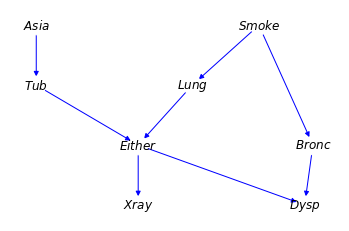

In [26]:
# Should be issues (Lung, Either) AT LEAST.
#.  Seeing issues (Lung, Xray) as well.  Is that all? 
# TODO: Check d-separations by hand...
import copy
asia_G2 = copy.deepcopy(asia_G)
asia_G2.draw()

In [27]:
asia_G2.directed.remove_edge(Variable("Lung"), Variable("Either")) #delete_diedge("Lung", "Either")
issues = falsification.falsifications(asia_G2, asia_df)
issues

19     (Dysp, Lung, (Smoke,))
15    (Dysp, Smoke, (Bronc,))
3            (Lung, Xray, ())
4          (Either, Lung, ())
20        (Either, Smoke, ())
17          (Smoke, Xray, ())
10        (Bronc, Either, ())
0           (Bronc, Xray, ())
dtype: object+evidence

In [28]:
issues.evidence

,left,right,given,chi^2,p,dof,Holm–Bonferroni level,flagged
19,Dysp,Lung,"(Smoke,)",83.247571,0.000000e+00,2,0.016667,True
15,Dysp,Smoke,"(Bronc,)",21.128858,2.581824e-05,2,0.007143,True
3,Lung,Xray,(),2094.106838,0.000000e+00,1,0.002632,True
4,Either,Lung,(),3099.534805,0.000000e+00,1,0.002778,True
20,Either,Smoke,(),196.335994,1.316547e-44,1,0.025000,True
17,Smoke,Xray,(),127.464729,1.469901e-29,1,0.010000,True
10,Bronc,Either,(),22.547558,2.050050e-06,1,0.004167,True
0,Bronc,Xray,(),14.983980,1.084278e-04,1,0.002273,True
18,Asia,Xray,"(Either,)",4.268355,1.183419e-01,2,0.012500,False
9,Bronc,Lung,"(Smoke,)",3.477138,1.757718e-01,2,0.003846,False


In [7]:
sorted((1,2))

[1, 2]